<!--HEADER-->
*Notas de aula de Modelagem Matemática - 2021/1 [- Ricardo M. S. Rosa (IM/UFRJ)](http://www.im.ufrj.br/rrosa)*

<!--BADGES-->
<a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2021p1/notas_de_aula/12.07-Ondas_sismicas.ipynb" target="_blank"><img align="left" src="https://img.shields.io/badge/view%20in-nbviewer-orange" alt="View in NBViewer" title="View in NBViewer"></a><a href="https://mybinder.org/v2/gh/rmsrosa/modelagem_matematica/julia-env-for-binder-2021p1?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Frmsrosa%252Fmodelagem_matematica%26branch%3Dmodmat2021p1%26urlpath%3Dtree%252Fmodelagem_matematica%252Fnotas_de_aula/12.07-Ondas_sismicas.ipynb" target="_blank"><img align="left" src="https://mybinder.org/badge.svg" alt="Open in binder" title="Open in binder"></a><a href="https://nbviewer.jupyter.org/github/rmsrosa/modelagem_matematica/blob/modmat2021p1/notas_de_aula/slides/12.07-Ondas_sismicas.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/view-slides-darkgreen" alt="View Slides" title="View Slides"></a>&nbsp;

<!--NAVIGATOR-->
[<- 12.6. Equação da onda em duas dimensões espaciais](12.06-EDP_onda_bidimensional.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) 

---


# Ondas sísmicas

* Propagação de onda em meios elásticos heterogêneos

* Simulação de ondas sísmicas e terremotos

In [1]:
using DifferentialEquations
using Plots
using Images

## Equações de movimento de materiais elásticos

### Representação Lagrangiana

Em mecânica do contínuo, a **representação Lagrangiana** da deformação de um corpo material (sólido, líquido, gás, etc.) ao longo do tempo se dá através de uma variável temporal $t$, uma variável de referência $\mathbf{X}$ para cada "partícula" do corpo e uma função

$$ \mathbf{x} = \mathbf{\chi}(t,\mathbf{X})
$$

que representa a posição da partícula $\mathbf{X}$ no instante $t$. 

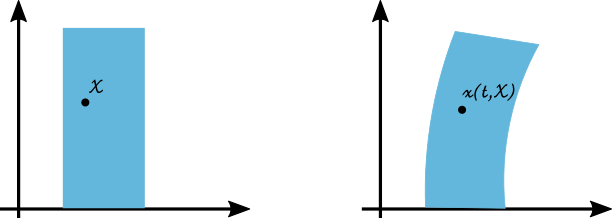

In [2]:
load(joinpath("img", "lagrangian_formulation.png"))

### Campo de deslocamentos

Em muitos casos, é útil considerarmos o **deslocamento** do corpo em relação a uma certa posição de referência.

Caso tomemos $\mathbf{x} = \mathbf{\chi}(t_0, \mathbf{X})$ como uma nova variável de referência, temos

$$ \mathbf{u}(t,\mathbf{x}) = \mathbf{\chi}(t_0+t, \mathbf{X}) - \mathbf{\chi}(t_0, \mathbf{X}) = \mathbf{\chi}(t, \mathbf{x}) - \mathbf{x}.
$$

Observe que

$$ \dot{\mathbf{u}} = \dot{\mathbf{\chi}}, \qquad  \ddot{\mathbf{u}} = \ddot{\mathbf{\chi}}
$$

representam a **velocidade** e **aceleração** de um ponto material do corpo, com essa notação de "ponto" indicando derivadas temporais.

A segunda lei de Newton nos dá que

$$ \rho \ddot{\mathbf{u}} = \text{ somatório das forças },
$$

onde $\rho = \rho(t, \mathbf{x})$ é a densidade do material no instante $t$ e posição $\mathbf{x}$.

### Equações de Navier para pequenas deformações

No caso de *pequenas deformações*, utilizando $\mathbf{x}$ e $\mathbf{u}$ como variáveis independente e dependente, conforme descrito acima, 
as **equações de Navier** de um meio contínuo consistem nas equações de **conservação de momento linear**

$$ \rho \frac{\partial^2 \mathbf{u}}{\partial t^2} = \mathbf{\nabla} \cdot \mathsf{\sigma} + \mathbf{f},
$$

além de outras equações relevantes (conservação de massa, temperatura, lei de estado, leis constitutivas, etc.).

Acima, 

- $\rho = \rho(t, \mathbf{x})$ é a densidade do material no instante $t$ e posição $\mathbf{x}$; 

- $\mathbf{f}=\mathbf{f}(t,\mathbf{x})$ representa o campo de forças externas agindo no corpo, como a força gravitacional; e 

- $\mathsf{\sigma}$ é o tensor de tensões, indicando as forças "de superfície" dadas pela interação/tensão molecular entre as diferentes partes do corpo.

Em temos de coordenadas, podemos escrever, mais explicitamente,

$$ \rho\frac{\partial^2 u_i}{\partial t^2} = \sum_{j=1}^d\frac{\partial \sigma_{ij}}{\partial x_j} + f_i, \qquad i= 1, \ldots, d,
$$

### Lei constitutiva de um material elástico Hookeano

Uma **lei constitutiva** relaciona o tensor de tensões $\mathsf{\sigma}$ a outras variáveis do estado do material. Ela caracteriza o material e depende das condições mecânicas (deformações), dinâmicas (velocidades de deformação) e termodinâmicas do mesmo (temperatura, pressão, etc.).

Um ponto de partida é assumir que o meio em que estamos interessados é um meio elástico modelado por uma lei constitutiva que segue a lei de Hooke

$$
  \mathsf{\sigma} = \mathsf{C} \mathcal{E}
$$
onde 

$$ \mathcal{E} = \frac{1}{2}\left( \frac{\partial u_i}{\partial x_j} + \frac{\partial u_j}{\partial x_i} \right)_{i,j=1}^d = \frac{1}{2} \left( \nabla \mathbf{u} + (\nabla \mathbf{u})^\rm{t}\right).
$$

é o **tensor de deformações** do material, $\nabla \mathbf{u}$ é o **gradiente de deformações**, $(\nabla\mathbf{u})^\rm{t}$ é a sua transposta, e  $\mathsf{C}$ é um tensor de quarta ordem chamado de **tensor de elasticidade**.

### Material elástico Hookeano isotrópico

Assumindo um material elástico Hookeano **isotrópico** e usando outras simetrias intrínsicas ao tensor de tensões, o tensor de tensões desse material é determinado por apenas dois parâmetros e a lei consitutiva se reduz à forma


$$ \mathsf{\sigma} = \lambda \rm{tr}(\mathcal{E})\mathcal{I} + 2\mu \mathcal{E}.
$$

onde $\lambda$ e $\mu$ são chamados de **coeficientes de Lamé**.

### Divergente do tensor de tensões de um material elástico Hookeano isotrópico

Usando a relação 

$$ \mathsf{\sigma} = \lambda \rm{tr}(\mathcal{E})\mathcal{I} + 2\mu \mathcal{E},
$$

o divergente de $\mathsf{\sigma}$, que aparece na equação de Navier, é dado por

$$ 
\mathbf{\nabla} \cdot \mathsf{\sigma} = \rm{tr}(\mathcal{E}) \mathsf{\mathbf{\nabla}}\lambda  + \lambda \mathbf{\nabla} \cdot (\rm{tr}(\mathcal{E})\mathsf{I}) + 2\mathbf{\nabla} \mu \cdot \mathcal{E} + 2\mu \mathbf{\nabla} \cdot \mathcal{E}.
$$

### Equações de Navier de um material elástico Hookeano isotrópico

Com a forma acima para o divergente do tensor de tensões, e utilizando algumas identidades vetoriais, obtemos as equações de movimento na forma

$$ \rho \mathbf{\ddot u} = \mathsf{\mathbf{\nabla}}\lambda (\mathbf{\nabla} \cdot \mathbf{u}) + \mathbf{\nabla} \mu \cdot\left( \mathbf{\nabla} \mathbf{u} + (\mathbf{\nabla} \mathbf{u})^\rm{t}\right) + (\lambda + 2\mu)\mathbf{\nabla} (\mathbf{\nabla} \cdot \mathbf{u})  - \mu \mathbf{\nabla} \times (\mathbf{\nabla} \times \mathbf{u}) + \mathbf{f}.
$$

### Desprezando os gradientes dos coeficientes de Lamé

Os termos envolvendo os gradientes $\mathsf{\mathbf{\nabla}}\lambda$ e $\mathsf{\mathbf{\nabla}}\mu$ dos coeficientes de Lamé são relativamente pequenos para perturbações de frequências relativamente altas.

Por esse motivo, em muitos casos, esses termos são normalmente desprezados e nos levam à equação vetorial

$$ \rho \mathbf{\ddot u} = (\lambda + 2\mu)\mathbf{\nabla} (\mathbf{\nabla} \cdot \mathbf{u})  - \mu \mathbf{\nabla} \times (\mathbf{\nabla} \times \mathbf{u}) + \mathbf{f}.
$$


### Ondas P e S

O deslocamento $\mathbf{u}=(u_i)_{i=1, \ldots, d}$ é uma quantidade bi- ou tri-dimensional.

Ele pode ser decomposto em duas partes, relativas a **ondas P** e **ondas S**, aplicando o divergente e o rotacional a $\mathbf{u}$ (quando $d=3$):

$$w_P = \mathbf{\nabla}\cdot \mathbf{u};$$

$$\mathbf{w}_S = \mathbf{\nabla}\times \mathbf{u}.$$

No caso bidimensional ($d=2$), a onda S também nos leva a um escalar $w_S$ e temos, mais explicitamente, escrevendo $\mathbf{u} = (u,v)$,

$$w_P = u_x + v_y;$$

$$w_S = v_x - u_y.$$

### Recuperando a onda original

No caso bidimensional, conhecidas as ondas 
$$ w_P = \partial_x u + \partial_y v, \qquad w_S = \partial_x v - \partial_y u,
$$

podemos ver que

$$ \partial_x w_P - \partial_y w_S = \Delta u, \qquad \partial_y w_P + \partial_x w_S = \Delta v,
$$

de modo que as coordenadas $u$ e $v$ do deslocamento $\mathbf{u}=(u,v)$ podem ser obtidas separadamente através da resolução de problemas elípticos. 

Analogamente no caso tridimensional.

### Equações para os termos associados às ondas P e S

Aplicando o divergente e o rotacional à equação e usando algumas identidades vetoriais, chega-se às seguintes equações, no caso bidimensional, para os termos $w_P$ e $w_S$:

$$
\frac{\partial^2 w_P}{\partial t^2} =  \frac{\lambda + 2\mu}{\rho} \Delta w_P + h_P,
$$

$$
\frac{\partial^2 w_S}{\partial t^2} = \frac{\mu}{\rho} \Delta w_S + h_S,
$$

onde 

$$ h_P = \mathbf{\nabla} \cdot \mathbf{f}, \qquad h_S = \mathbf{\nabla} \times \mathbf{f}
$$

Ambas são da forma

$$ \frac{\partial^2 w}{\partial t^2} =  c^2 \Delta w + h,
$$

com velocidades respectivas $c=c_P$ e $c_S$ dadas por

$$ c_P = \sqrt{\frac{\lambda + 2\mu}{\rho}}, \qquad c_S = \sqrt{\frac{\mu}{\rho}}.
$$

Tipicamente, $\lambda, \mu>0$, de modo que $c_P > c_S$.

### Velocidades típicas de ondas P de certas rochas 

Os parâmetros $\lambda, \mu$ e $\rho$ são diferentes para diferentes tipos de rocha e, mesmo para um mesmo tipo de rocha, variam de acordo com suas propriedades termodinâmicas, como temperatura e pressão.

De qualquer forma, aqui vai uma tabela com valores típicos da velocidade $c_P$ das ondas primárias (e das ondas acústicas) de materias da crosta terrestre.

| Tipo de rocha | velocidade (m/s) |
| ----------|:--------------:|
| xisto |1800 - 4900 |
| Arenito | 5800 |
| Calcário | 5800 - 6400 |
| Anidrita | 6100 |
| Granito |5800 - 6100 |
| Dolomita | 6400 - 7300 |
| Gabro | 7200 |

## Ondas acústicas

**Ondas acústicas** estão associadas às ondas P por

$$ p = \lambda \mathbf{\nabla} \cdot \mathbf{u} = \lambda w_P.
$$


Essas equações modelam tanto a propagação de ondas sísmicas (pelo menos a parte associada às ondas P) na crosta terrestre como a de ondas sonoras que escutamos ao nosso entorno.

Nesse caso, temos

$$
\frac{\partial^2 p}{\partial t^2} = c^2 \Delta p + g,
$$

onde $c=c(\mathbf{x})$ é a velocidade de propagação da onda acústica (mesma que a da onda P) no ponto $\mathbf{x},$ em um meio possivelmente heterogêneo, e $g=g(t,\mathbf{x})$ é uma fonte externa de geração de ondas acústicas.

### Decomposição de Helmholtz e os potenciais das ondas P e S

O deslocamento $\mathbf{u}$ pode ser escrito em termos da decomposição de Helmholtz, como a soma de um termo gradiente e outro de divergente nulo, i.e

$$ \mathbf{u} = \mathbf{\nabla} \phi + \mathbf{\nabla} \times \mathbf{\Psi},
$$

onde $\phi$ é um campo potencial escalar e $\mathbf{\Psi}$ é um campo potencial vetorial.

Com isso, temos, explicitamente, a decomposição em ondas P e ondas S dada por

$$ \mathbf{u} = \mathbf{u}_P + \mathbf{u}_S, \qquad \mathbf{u}_P = \mathbf{\nabla} \phi, \quad \mathbf{u}_S = \mathbf{\nabla} \times \mathbf{\Psi}.
$$

Observe que

$$  \mathbf{\nabla}\times \mathbf{u}_P = \mathbf{\nabla} \times \mathbf{\nabla} \phi = 0, \qquad \mathbf{\nabla}\cdot \mathbf{u}_S = \mathbf{\nabla} \cdot \mathbf{\nabla} \times \mathbf{\Psi} = 0,
$$

de modo que

$$ \mathbf{\nabla}\cdot \mathbf{u} = \Delta \phi, \qquad \mathbf{\nabla} \times \mathbf{u} = - \Delta \mathbf{\Psi}.
$$

justificando a associação de $\phi$ e $\mathbf{\Psi}$ diretamente às ondas P e ondas S, respectivamente.

### Potenciais no caso bidimensional

No caso bidimensional, podemos considerar $\mathbf{\Psi}$ como um campo escalar $\Psi$, e temos

$$ \Delta \phi = w_P, \qquad \Delta \psi = - w_S.
$$

Os potenciais $\phi$ e $\psi$ satisfazem equações da onda idênticas às equações para $w_P$ e $w_S$.

## Ondas acústicas em um meio bidimensional

A seguir, para simplificar, consideramos apenas a propagação de ondas acústicas em um meio bidimensional em um plano $xz$, com $x$ representando uma variável horizontal, paralela à superfície da Terra, e $z$ a profundidade a partir da superfície. Nesse caso,

$$
\frac{\partial^2 p}{\partial t^2} = c^2 \left(\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial z^2}\right) + g,
$$

onde $c=c(x,z)$ é a velocidade de propagação da onda acústica (mesma que a da onda P) no ponto $(x,z)$, em um meio possivelmente heterogêneo, e $g=g(t,x,z)$ é uma fonte externa de geração de ondas acústicas.

## Discretização espaço-temporal via diferenças finitas

Uma opção é fazermos uma discretização espaço-temporal.

Consideramos uma malha espacial uniforme $(x_i, z_j)$, com intervalos espaciais $\mathrm{d} x$ e $\mathrm{d} z$ em cada direção, e uma malha temporal $t_n$, com intervalo temporal $\mathrm{d} t$.  

Aproximamos as derivadas de segunda ordem pelo método clássico de segunda ordem usando três pontos (na direção correspondente).

A aproximação de $p=p(t_n,x_i,z_j)$ nos pontos da malha é denotada por $p_{i,j}^n$. Analogamente para $c$ e $g$, exceto que assumimos que $c$ não depende de $t$.

Isso nos leva à equação em diferenças finitas

$$
 \frac{p_{i,j}^{n+1} - 2 p_{i,j}^n + p_{i,j}^{n-1}}{\mathrm{d}t^2}  = c_{i,j}^2 \left( \frac{p_{i+1,j}^{n} - 2 p_{i,j}^n + p_{i-1,j}^{n}}{\mathrm{d}x^2} + \frac{p_{i,j+1}^{n} - 2 p_{i,j}^n + p_{i,j-1}^{n}}{\mathrm{d}z^2}\right) \ + g_{i,j}^n.
$$

Essa equação pode ser escrita para $p^{n+1}$ explicitamente em função dos passos anteriores $p^n$, $p^{n-1}$ e dos parâmetros conhecidos $g^n$ e $c$.

## Discretização espacial

Outra opção é uma discretização apenas espacial, em um malha $(x_i,z_j)$, com $p=p_{i,j}(t)$, chegando a um sistema de EDOs
$$ \frac{\mathrm{d}p_{i,j}}{\mathrm{d}t}(t) = c_{i,j}^2 \left( \frac{p_{i+1,j}(t) - 2 p_{i,j}(t) + p_{i-1,j}(t)}{\mathrm{d}x^2} + \frac{p_{i,j+1}(t) - 2 p_{i,j}(t) + p_{i,j-1}(t)}{\mathrm{d}z^2}\right) \ + g_{i,j}(t).
$$

Esta é um sistema de equações de segunda ordem no tempo, que pode ser transformado em outro sistema de equações de primeira ordem,

## Parâmetros do domínio espacial e de sua discretização

In [3]:
Lx = 6000    # extensão (horizontal) do domínio (metros)
Lz = 4000    # profundidade do domínio (metros)
Nx = 600      # número de pontos da malha na direção horizontal
Nz = 400      # número de pontos da malha na direção vertical
dx = Lx/(Nx-1)    # distância entre os pontos da malha na direção horizontal
dz = Lz/(Nz-1)    # distância entre os pontos da malha na direção vertical
x = range(0.0, Lx, length=Nx)
z = range(0.0, Lz, length=Nz)
println("Parâmetros:")
println("  Lx = $Lx m")
println("  Lz = $Lz m")
println("  Nx = $Nx")
println("  Nz = $Nz")
println("  dx = $(round(dx, digits=2)) m")
println("  dz = $(round(dz, digits=2)) m")

Parâmetros:
  Lx = 6000 m
  Lz = 4000 m
  Nx = 600
  Nz = 400
  dx = 10.02 m
  dz = 10.03 m


## Estrutura geológica

A crosta terrestre é composta de diferentes materiais. Para efeito da propagação de ondas sísmicas, precisamos definir as velocidades de propagação de ondas elásticas do meio. Vamos considerar algumas estruturas, definidas por uma função `campo_de_velocidades`, que retorna o campo de velocidades $c(x,z)$ para cada `tipo` de perfil do meio, com uma velocidade de referência $c0$ e para algum ruído $\varepsilon$.

In [4]:
function campo_de_velocidades(Nx::Int64, Nz::Int64, tipo::Symbol;
        c0::Float64 = 6000.0, ε::Float64 = 0.0)::Matrix{Float64}

    if tipo == :homogenea
        c = c0 * ones(Nz, Nx)
    elseif tipo == :camada_inclinada
        c = c0 * ones(Nz, Nx)
        for i in 1:Nx
            for j in 1:Int(floor((2+3i/Nx) * Nz/6))
                c[j, i] =  0.9 * c0
            end
        end
    elseif tipo == :camadas_inclinadas
        c = c0 * ones(Nz, Nx)
        for m in (6, 8, 12, 14, 17, 20, 22, 25, 28, 30) # (30, 28, 25, 22, 20, 17, 14, 12, 8, 6)
            for i in 1:Nx
                for j in 1:Int(floor((m/100 * (2 + i/Nx)) * Nz))
                    c[j, i] -=  0.01 * c0
                end
            end
        end
    else
        throw(ArgumentError("Tipo $tipo não implementado"))
    end

    c .+= ε * c0 * randn(Nz, Nx) 
        
    return c
end

campo_de_velocidades (generic function with 1 method)

### Visualizando as estruturas

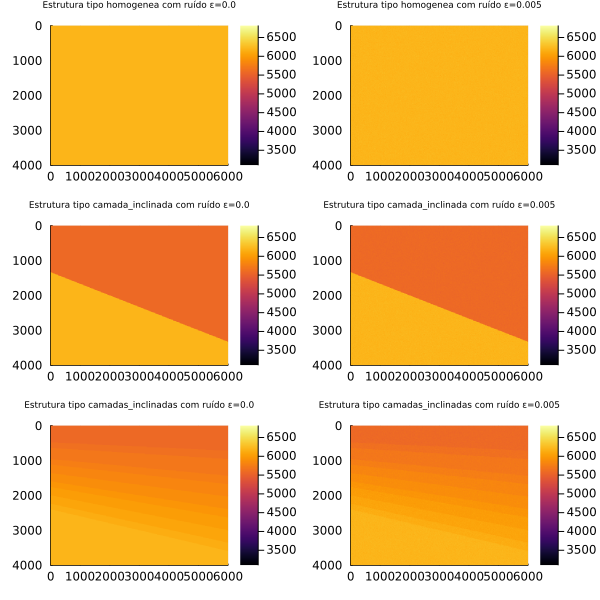

In [5]:
tipos = (:homogenea, :camada_inclinada, :camadas_inclinadas)
ruidos = (0.0, 0.005)
plts = []
c0 = 6200.0
for tipo in tipos
    for ε in ruidos
        c = campo_de_velocidades(Nx, Nz, tipo, c0=c0, ε=ε)
        push!(plts, heatmap(x, z, c, clims=(0.5*c0, 1.1*c0), yflip=true,
                title="Estrutura tipo $tipo com ruído ε=$ε", titlefont=6))
    end
end
ncols = 2
nlinhas = divrem(length(tipos)*length(ruidos), ncols) |> drn -> drn[1] + sign(drn[2])
plot(plts..., layout = (nlinhas, ncols), size=(600,div(600*Lz*nlinhas,Lx*ncols)))

## Sensores

Consideramos alguns sensores (de pressão, no caso) localizados próximos a superfície. Definimos, no momento, as suas coordenadas $(x,z)$.

In [6]:
sensor_i = [div(k*Nz,10) for k=5:9] # [2*nz//10 , 3*nz//10, 4*nz//10, 5*nz//10, 6*nz//10]
sensor_j = div(1*Nx,20) * ones(Integer,length(sensor_i))
println("Temos $(length(sensor_j)) sensores, localizados nas seguintes coordenadas:")
for k in 1:length(sensor_j)
    println("  Sensor $k localizado em (x,z) = ($(round(sensor_i[k]*dx,digits=2)), $(round(sensor_j[k]*dz,digits=2))) m")
end

Temos 5 sensores, localizados nas seguintes coordenadas:
  Sensor 1 localizado em (x,z) = (2003.34, 300.75) m
  Sensor 2 localizado em (x,z) = (2404.01, 300.75) m
  Sensor 3 localizado em (x,z) = (2804.67, 300.75) m
  Sensor 4 localizado em (x,z) = (3205.34, 300.75) m
  Sensor 5 localizado em (x,z) = (3606.01, 300.75) m


### Visualizando a posição dos sensores

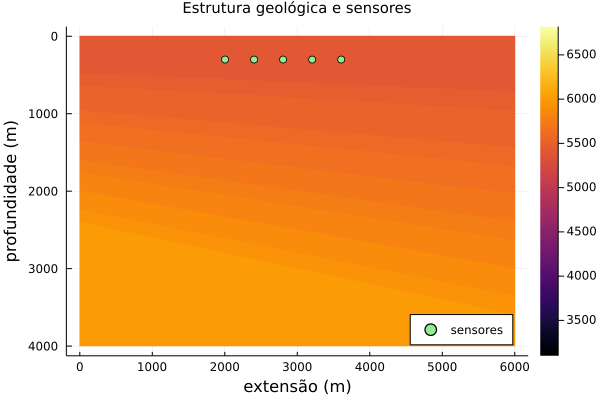

In [7]:
tipo = :camadas_inclinadas
c = campo_de_velocidades(Nx, Nz, tipo)
heatmap(x, z, c, clims=(0.5*c0, 1.1*c0), yflip=true,
    xlabel="extensão (m)", ylabel="profundidade (m)", legend=:bottomright,
    title="Estrutura geológica e sensores", titlefont=10)
scatter!(dx * sensor_i, dz * sensor_j, label="sensores", color=:lightgreen)

## Parâmetros para a evolução temporal

Definimos um tempo final $T_{\rm max}$ para a simulação numérica.

Vamos aproximar as derivadas de segunda ordem, tanto no tempo como no espaço, pelo método padrão de diferenças finitas usando três pontos, que dá uma aproximação de segunda ordem.

Por questões de estabilidade, a condição de CFL (Courant-Friedrichs-Lewy) deve ser satisfeita. Essencialmente, ela requer que o cone de influência da condição inicial em um ponto $(t,x,z)$ da solução pela EDP deve estar contido no cone correspondente da equações em diferenças finitas.

No caso em questão (equação da onda bidimensional, com aproximação de segunda ordem padrão, velocidade máxima $c$ e passos distintos $\rm{d}x$ e $\rm{d}y$ em cada direção), a condição de CFL local tem a forma

$$ \rm{d} t \leq \frac{1}{c}\frac{\rm{d} x\rm{d} y}{\sqrt{\rm{d}x^2 + \rm{d}y^2}}.
$$

## Definição dos parâmetros temporais

Assim, definimos os parâmetros temporais 

In [8]:
Tf = 1.0 # tempo final (segundos)
#dt_lim = dx*dz / sqrt(dx^2 + dz^2) / maximum(abs.(c)) # limite pro passo temporal (segundos)
#Nt = Int(ceil(Tf / dt_lim))
Nt = 50
dt = Tf / Nt
t_intervalo = range(0.0, Tf, length=Nt)
t_span = (0.0, Tf)

println("Tempo final da simulação: $(round(Tf,digits=2)) s")
println("Número de passos temporais: $Nt")
println("Passo temporal: $(round(1000*dt,digits=2)) ms")

Tempo final da simulação: 1.0 s
Número de passos temporais: 50
Passo temporal: 20.0 ms


## Termo de fonte

Consideramos uma fonte de onda acústica em algum ponto no interior do domínio, com uma forma Gaussiana no tempo.

In [9]:
fonte_foco_i = div(3*Nx,10) # índice da posição longitudinal do foco
fonte_foco_j = div(3*Nz,5) # índice da posição vertical do foco
fonte_pico_t = 0.1 # instante de tempo do pico do sinal da fonte (segundos)
fonte_freq = 20.0 # frequência de onda fonte (Hertz)
fonte_periodo = 1/fonte_freq # período de onda da fonte (segundos)

println("Instante do pico da fonte do tremor: $(round(fonte_pico_t,digits=2)) s")
println("Posição do foco: ($(round(fonte_foco_i*dx,digits=1)), $(round(fonte_foco_j*dz,digits=1)) m")
println("Índices do foco: (i,j) = ($(fonte_foco_i), $(fonte_foco_j)")
println("Frequência principal da fonte de tremor: $(fonte_freq) Hz")
println("Período principal da fonte de tremor: $(1000*fonte_periodo) ms ")

Instante do pico da fonte do tremor: 0.1 s
Posição do foco: (1803.0, 2406.0 m
Índices do foco: (i,j) = (180, 240
Frequência principal da fonte de tremor: 20.0 Hz
Período principal da fonte de tremor: 50.0 ms 


### Foco da fonte

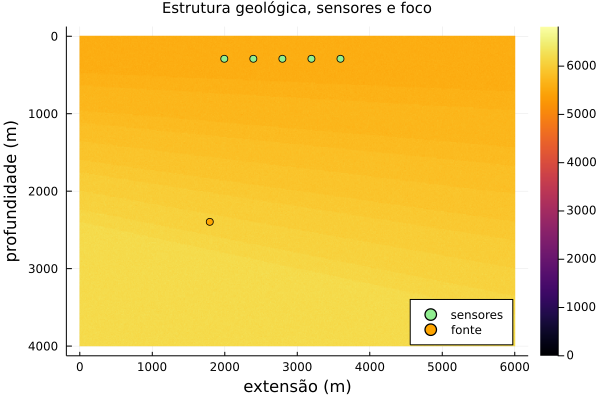

In [10]:
tipo = :camadas_inclinadas
#tipo = :homogenea
c = campo_de_velocidades(Nx, Nz, tipo, c0=6200.0, ε=0.005)
heatmap(x, z, c, clims=(0.0, 1.1*c0), yflip=true,
    xlabel="extensão (m)", ylabel="profundidade (m)", legend=:bottomright,
    title="Estrutura geológica, sensores e foco", titlefont=10)
scatter!((sensor_i.-1)*dx, (sensor_j.-1)*dz, label="sensores", color=:lightgreen)
scatter!([(fonte_foco_i-1)*dx], [(fonte_foco_j-1)*dz], label="fonte", color=:orange)

## Sinal temporal da fonte

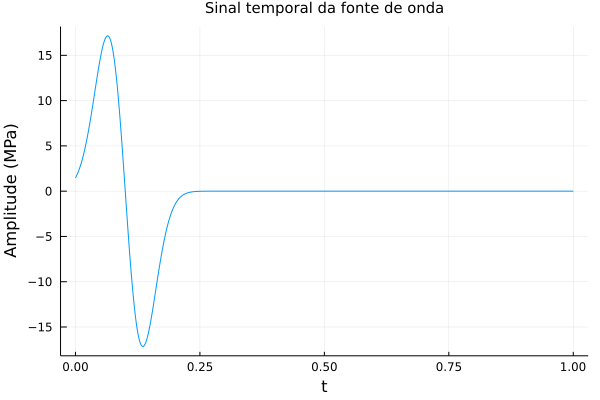

In [11]:
fonte(t) = (-2(t-fonte_pico_t)/fonte_periodo^2) * exp(-(t-fonte_pico_t)^2/fonte_periodo^2)
plot(0.0:0.002:1.0, fonte, legend=false, xlabel="t", ylabel="Amplitude (MPa)",
    title="Sinal temporal da fonte de onda", titlefont=10)

## Evolução temporal

### Discretização do Laplaciano

In [12]:
function δ²(u::Matrix{Float64}, hx2::Float64, hy2::Float64, ::Val{:dir})
    n, m = size(u)
    ddu = zero(u)
    for j = 2:m-1
        for i = 2:n-1
            ddu[i,j] = (u[i,j+1] - 2u[i,j] + u[i,j-1])/hx2 + 
                (u[i+1,j] - 2u[i,j] + u[i-1,j])/hy2
        end
    end
    return ddu
end

δ² (generic function with 1 method)

## Lei de evolução

* Transformamos a equação de segunda ordem no tempo $p_{tt} = c\Delta p + g$ em um sistema de primeira ordem
$$ \begin{cases}
    p_t = q, \\
    q_t = c\Delta p + g.
\end{cases}
$$

* Nesse caso, fazemos, novamente, $U=(p,q)$, onde as discretizações de $p$ e $q$ são matrizes.

* Assim, definimos $U$ como um array de dimensões $Nx\times Nz \times 2$, onde
$$ p = U[:,:,1], \qquad q = U[:,:,2]
$$

In [13]:
function dUdt_onda2d!(dUdt, U, params, t)
    c2, hx2, hz2, fonte, fonte_foco_i, fonte_foco_j = params
    p = U[:,:,1]
    q = U[:,:,2]
    dUdt[:,:,1] .= q
    dUdt[:,:,2] .= c2 .* δ²(p, hz2, hx2, Val(:dir))
    dUdt[fonte_foco_j, fonte_foco_i,2] += fonte(t)
    return nothing
end

dUdt_onda2d! (generic function with 1 method)

In [14]:
# inicializa sismograma
sismograma = zeros((length(sensor_j), Nt)) 

# inicializa pressão p e sua derivada temporal inicial q=p_t
p₀ = q₀ = zeros(Nz, Nx)
U₀ = fill(0.0, size(p₀)..., 2)
U₀[:,:,1] .= p₀ 
U₀[:,:,2] .= q₀
params = [c.^2, dx^2, dz^2, fonte, fonte_foco_i, fonte_foco_j] # parâmetros

prob = ODEProblem(dUdt_onda2d!, U₀, t_span, params, saveat = dt)
nothing

In [15]:
sol = solve(prob, Tsit5())
sol.retcode

:Success

In [16]:
pmin = minimum([minimum(sol.u[k]) for k in 1:length(sol.u)])
pmax = maximum([maximum(sol.u[k]) for k in 1:length(sol.u)])
println("Mínimo de pressão acústica: $(round(pmin, digits=4))")
println("Máximo de pressão acústica: $(round(pmax, digits=4))")

Mínimo de pressão acústica: -0.0101
Máximo de pressão acústica: 0.0098


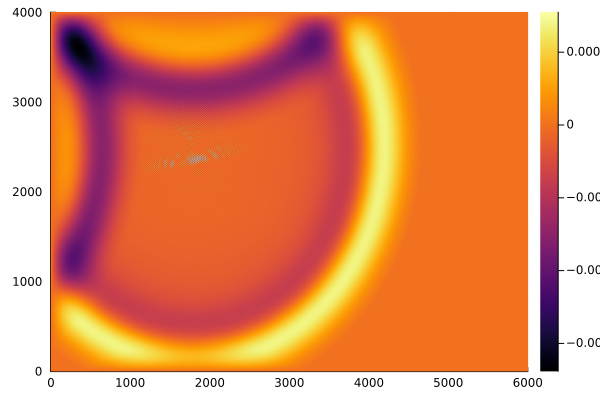

In [17]:
heatmap(x, z, sol.u[div(end,2)][:,:,1])#, clims=(pmin,pmax))

┌ Info: Saved animation to 
│   fn = /Users/rrosa/Documents/git_repositories/modelagem_matematica/notas_de_aula/img/anim_sismica_a.gif
└ @ Plots /Users/rrosa/.julia/packages/Plots/SVksJ/src/animation.jl:104


Plots.AnimatedGif("/Users/rrosa/Documents/git_repositories/modelagem_matematica/notas_de_aula/img/anim_sismica_a.gif")
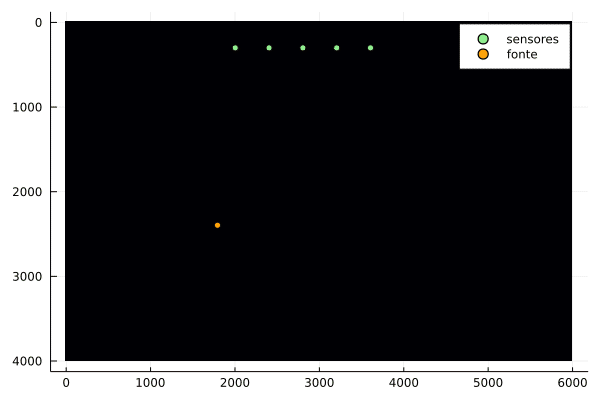

In [18]:
control = 0
anim = @animate for (t,U) in zip(sol.t, sol.u)
    control += 1
    if control == 40
        break
    end
    #heatmap(x, z, c, clims=(0.0, 1.1*c0),
    #    xlabel="extensão (m)", ylabel="profundidade (m)",
    #    title="Evolução da sísmica", titlefont=10)
    heatmap(x, z, U[:,:,1], alpha=1.0, yflip=true, size=(600,400), #clims=(pmin, pmax), 
        label="t=$(round(t,digits=2))", colorbar=false)
    scatter!(dx * sensor_i, dz * sensor_j, label="sensores", color=:lightgreen)
    scatter!([(fonte_foco_i-1)*dx], [(fonte_foco_j-1)*dz], label="fonte", color=:orange)
end
gif(anim, joinpath("img", "anim_sismica_a.gif"), fps = 20)

## Leitura dos sensores

In [19]:
n = 1
signals = fill(0.0, length(sol.t), length(sensor_j))
for n = 1:length(sensor_j)
    for k = 1:length(sol.t)
        signals[k, n] = sol.u[k][sensor_j[n], sensor_i[n],1]
    end
end

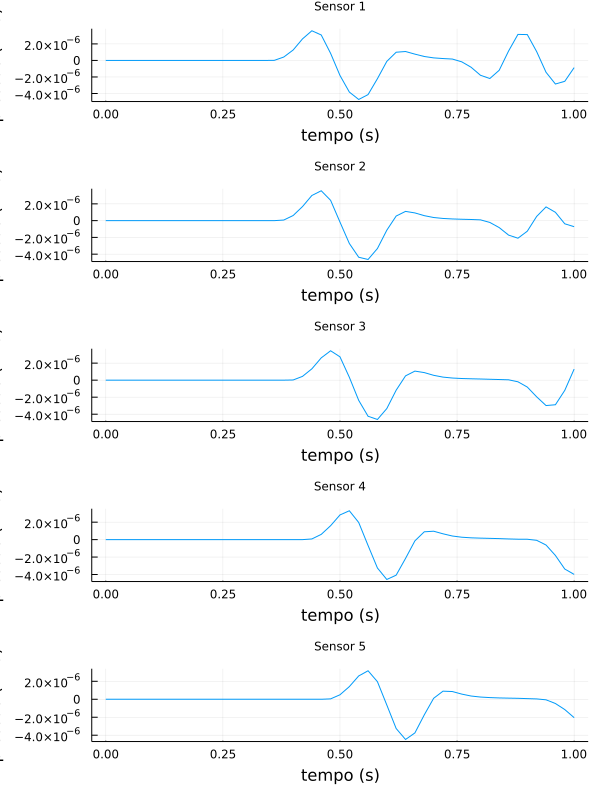

In [20]:
plot(sol.t, signals, legend=false, 
    title=["Sensor 1" "Sensor 2" "Sensor 3" "Sensor 4" "Sensor 5"], titlefont=8,
    layout=(5,1), xlabel="tempo (s)", ylabel="pressão (MPa)", size=(600, 800))

## Exercícios

1. Escreva as equações para os potenciais $\phi$ e $\psi$, no caso bidimensional.

1. Modifique o código acima para resolver numericamente os potenciais $\phi$ e $\psi$.

1. A partir de $\phi$ e $\psi$, obtenha as coordenadas $u$ e $v$ do campo de deslocamentos.

1. Faça os sensores lerem os deslocamentos vertical e horizontal do deslocamento.

<!--NAVIGATOR-->

---
[<- 12.6. Equação da onda em duas dimensões espaciais](12.06-EDP_onda_bidimensional.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) 